In [1]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

In [85]:
analysis = Analysis("/home/sergei/ray_results/adversarial_tune_recover_withnormal_sb")

In [86]:
target = 'policy_reward_mean/player_2_pretrained_sb'

In [87]:
df = analysis.dataframe(metric=target, mode='max')

In [88]:
df.iloc[0]

episode_reward_max                                                     7.04425
episode_reward_min                                                    -2.53259
episode_reward_mean                                                    4.48875
episode_len_mean                                                       173.381
episodes_this_iter                                                         113
                                                   ...                        
config/run_uid                                                          _setme
config/sgd_minibatch_size                                                 4096
config/train_batch_size                                                  16384
config/use_gae                                                            True
logdir                       /home/sergei/ray_results/adversarial_tune_reco...
Name: 0, Length: 102, dtype: object

In [89]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       ...
       'config/num_envs_per_worker', 'config/num_gpus', 'config/num_sgd_iter',
       'config/num_workers', 'config/rollout_fragment_length',
       'config/run_uid', 'config/sgd_minibatch_size',
       'config/train_batch_size', 'config/use_gae', 'logdir'],
      dtype='object', length=102)

In [90]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target or k == 'checkpoint_rllib' or k == 'logdir' or k == 'experiment_tag'):
        del df[k]

In [91]:
df = df.sort_values(target, ascending=False)

In [92]:
df

,checkpoint_rllib,experiment_tag,policy_reward_mean/player_2_pretrained_sb,config/_base_dir,config/_call,config/_checkpoint_restore_policy,config/_env,config/_env_fcn,config/_env_name_rllib,config/_get_policies,...,config/num_envs_per_worker,config/num_gpus,config/num_sgd_iter,config/num_workers,config/rollout_fragment_length,config/run_uid,config/sgd_minibatch_size,config/train_batch_size,config/use_gae,logdir
1,/home/sergei/ray_results/External_multicomp_20...,4,12.091342,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_tu...",{'player_1_pretrained_adversary_sb': './result...,"{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7f8686657170>,multicomp,<function get_policies_withnormal_sb at 0x7f86...,...,10,0,4,3,100,_setme,4096,16384,True,/home/sergei/ray_results/adversarial_tune_reco...
3,/home/sergei/ray_results/External_multicomp_20...,3,11.467525,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_tu...",{'player_1_pretrained_adversary_sb': './result...,"{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7f8686657170>,multicomp,<function get_policies_withnormal_sb at 0x7f86...,...,10,0,4,3,100,_setme,4096,16384,True,/home/sergei/ray_results/adversarial_tune_reco...
4,/home/sergei/ray_results/External_multicomp_20...,0,11.366417,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_tu...",{'player_1_pretrained_adversary_sb': './result...,"{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7f8686657170>,multicomp,<function get_policies_withnormal_sb at 0x7f86...,...,10,0,4,3,100,_setme,4096,16384,True,/home/sergei/ray_results/adversarial_tune_reco...
0,/home/sergei/ray_results/External_multicomp_20...,2,11.302904,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_tu...",{'player_1_pretrained_adversary_sb': './result...,"{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7f8686657170>,multicomp,<function get_policies_withnormal_sb at 0x7f86...,...,10,0,4,3,100,_setme,4096,16384,True,/home/sergei/ray_results/adversarial_tune_reco...
2,/home/sergei/ray_results/External_multicomp_20...,1,10.933282,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_tu...",{'player_1_pretrained_adversary_sb': './result...,"{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7f8686657170>,multicomp,<function get_policies_withnormal_sb at 0x7f86...,...,10,0,4,3,100,_setme,4096,16384,True,/home/sergei/ray_results/adversarial_tune_reco...


(array([1., 0., 0., 2., 1., 0., 0., 0., 0., 1.]),
 array([10.9332825 , 11.04908847, 11.16489445, 11.28070042, 11.3965064 ,
        11.51231237, 11.62811835, 11.74392432, 11.8597303 , 11.97553627,
        12.09134225]),
 <a list of 10 Patch objects>)

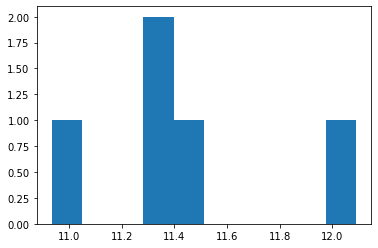

In [93]:
plt.hist(df[target])

In [94]:
idx = 1
best_trial = df.iloc[idx].logdir
df.iloc[idx]

checkpoint_rllib                             /home/sergei/ray_results/External_multicomp_20...
experiment_tag                                                                               3
policy_reward_mean/player_2_pretrained_sb                                              11.4675
config/_base_dir                                   /scratch/sergei/better-adversarial-defenses
config/_call                                 {'checkpoint_freq': 0, 'name': 'adversarial_tu...
config/_checkpoint_restore_policy            {'player_1_pretrained_adversary_sb': './result...
config/_env                                  {'SingleAgentToMultiAgent': False, 'env_name':...
config/_env_fcn                                        <function create_env at 0x7f8686657170>
config/_env_name_rllib                                                               multicomp
config/_get_policies                         <function get_policies_withnormal_sb at 0x7f86...
config/_log_error                                 

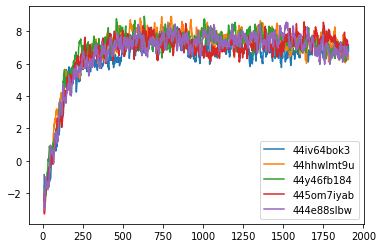

In [95]:
for k, df_ in analysis.trial_dataframes.items():
    rew = df_[target]
    plt.plot(pd.Series(rew).rolling(10).mean()[:4000], label=k.split('-')[-1])
    #imax = np.argmax(rew)
    plt.legend()
#     imax = -1
#     plt.axvline(imax)

In [96]:
idx = 0
best_trial = df.iloc[idx].logdir
df.iloc[idx]
best_trial

'/home/sergei/ray_results/adversarial_tune_recover_withnormal_sb/train_one_with_sacred_4_2020-09-21_11-36-44hhwlmt9u'

In [97]:
df_best = analysis.trial_dataframes[best_trial]

In [98]:
checkpoint = df_best.checkpoint_rllib.iloc[imax]
checkpoint

'/home/sergei/ray_results/External_multicomp_2020-09-22_10-55-23_joq3ccx/checkpoint_1907/checkpoint-1907'

In [103]:
!python ../make_video.py --checkpoint {checkpoint} --no_video=True --steps 50 --config=victim_recover_withnormal_sb

Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents
Config {'env': 'multicomp', 'env_config': {'with_video': False, 'SingleAgentToMultiAgent': False, 'env_name': 'multicomp/YouShallNotPassHumans-v0'}, 'multiagent': {'policies_to_train': [], 'policies': {'player_1_pretrained_adversary_sb': (<class 'ray.rllib.policy.tf_policy_template.PPOTFPolicy'>, Box(380,), Box(17,), {'model': {'custom_model': 'GymCompetePretrainedModel', 'custom_model_config': {'agent_id': 0, 'env_name': 'multicomp/YouShallNotPassHumans-v0', 'model_config': {}, 'name'

In [104]:
!export DISPLAY=:0; python ../make_video.py --checkpoint {checkpoint} --config=victim_recover_withnormal_sb

Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents
GLFW error: 65544, desc: b'X11: RandR gamma ramp support seems broken'
Config {'env': 'multicomp', 'env_config': {'with_video': True, 'SingleAgentToMultiAgent': False, 'env_name': 'multicomp/YouShallNotPassHumans-v0'}, 'multiagent': {'policies_to_train': [], 'policies': {'player_1_pretrained_adversary_sb': (<class 'ray.rllib.policy.tf_policy_template.PPOTFPolicy'>, Box(380,), Box(17,), {'model': {'custom_model': 'GymCompetePretrainedModel', 'custom_model_config': {'agent_id': 0, 'env_n

In [81]:
#video = _
video = "video-20200918-135137-beae468e-f9f0-11ea-b316-e0d55e6af99c/video.000000.mp4"

In [82]:
from IPython.display import display, FileLink

local_file = FileLink(video, result_html_prefix="Click here to download: ")
display(local_file)

/scratch/sergei/better-adversarial-defenses/experiment_analysis/video-20200918-135137-beae468e-f9f0-11ea-b316-e0d55e6af99c/video.000000.mp4

In [83]:
from IPython.display import HTML

HTML(f"""
    <video alt="test" controls>
        <source src="{video}" type="video/mp4">
    </video>
""")


In [77]:
f"""
    <video alt="test" controls>
        <source src="{video}" type="video/mp4">
    </video>
"""

'\n    <video alt="test" controls>\n        <source src="experiment_analysis/video-20200918-135137-beae468e-f9f0-11ea-b316-e0d55e6af99c/video.000000.mp4" type="video/mp4">\n    </video>\n'